### LSE Data Analytics Online Career Accelerator

# DA201: Data Analytics using Python

## Week 6: Assignment (Partial notebook)

The government employed an external consultant to assist with data analysis. However, the consultant resigned and left the project in a half-completed state. The government provided you with the partially completed Jupyter Notebook that the consultant developed. They asked you to evaluate and complete the Jupyter Notebook with Python code.

This assignment activity will consist of two parts: (1) demonstrate the use of the functions provided, and (2) answer additional questions posed by the government. The questions are:

- What is the difference between qualitative and quantitative data? How can these be used in business predictions?
- Why is continuous improvement required? Can we not just implement the project and move on to other pressing matters?
- As a government, we adhere to all data protection requirements and have good governance in place. We only work with aggregated data and therefore will not expose any personal details. Does that mean we can ignore data ethics?

In [1]:
# Libraries and settings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# Load and select relevant subset of the data
# Make sure to change the relative path to function in your environment
ds1 = pd.read_csv('/Users/tunatuncay/Documents/Personal/LSE Data Analytics/Module 2/Module 2 Assignment/Date Provided/LSE_DA201_Assignment_files/covid_19_uk_cases.csv')
ds2 = pd.read_csv('/Users/tunatuncay/Documents/Personal/LSE Data Analytics/Module 2/Module 2 Assignment/Date Provided/LSE_DA201_Assignment_files/covid_19_uk_vaccinated.csv')

sample = ds1[['Province/State','Date','Hospitalised']]

In [3]:
# Select data for a specific province
sample_ci = sample[sample['Province/State'] == "Channel Islands"]

In [4]:
# Define function to plot moving averages
def plot_moving_average(series, window, plot_intervals=False, scale=1.96):
    
    # Create a rolling window to calculate the rolling mean using the series.rolling function
    rolling_mean = series.rolling(window=window).mean()
    
    # Declare the dimensions for the plot, plot name and plot the data consisting of the rolling mean from above 
    plt.figure(figsize=(18,4))
    plt.title('Moving average\n window size = {}'.format(window))
    plt.plot(rolling_mean, 'g', label='Simple moving average trend')

    
    # Plot confidence intervals for smoothed values
    if plot_intervals:
        
        # Calculate the mean absolute square 
        mae = mean_absolute_error(series[window:], rolling_mean[window:])
        
        # Calculate the standard deviation using numpy's std function
        deviation = np.std(series[window:] - rolling_mean[window:])
        
        # Calculate the upper and lower bounds 
        lower_bound = rolling_mean - (mae + scale * deviation)
        upper_bound = rolling_mean + (mae + scale * deviation)
        
        # Name and style upper and lower bound lines and labels 
        plt.plot(upper_bound, 'r--', label='Upper bound / Lower bound')
        plt.plot(lower_bound, 'r--')
    
    # Plot the actual values for the entire timeframe
    plt.plot(series[window:], label='Actual values')
    plt.grid(True)

In [5]:
# Define function to calculate the mean absolute error
def mean_absolute_error(a, b): return abs(b - a)

### Question 1:

The consultant indicated that the function is functional, but did not demonstrate how to use it. Use the provided function, `plot_moving_average()`, to plot the data for the selected province (variable name is `sample_ci` and set the window parameter to 7 days. 

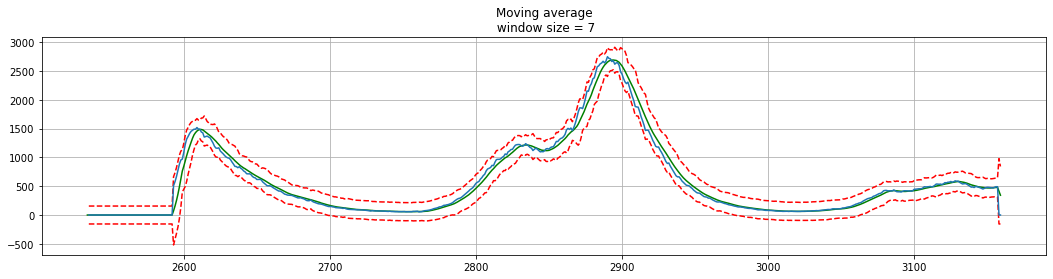

In [6]:
# Plotting Channel Islands moving average hospitalisation rates
plot_moving_average(sample_ci.Hospitalised,7,plot_intervals=True)

In [10]:
# The graph itself is correct but x column does not make any sense. 
# It should be date where as showing indexes. That means I need to move date values to index and replot.

# Converting dates to month/year form first
sample_ci.to_csv('sample_ci.csv')

# Taking date column to index
sample_ci_newformat = pd.read_csv('sample_ci.csv', index_col=['Date'], parse_dates=['Date'])
sample_ci_newformat.head()

,Unnamed: 0,Province/State,Hospitalised
Date,,,
2020-01-22,2528,Channel Islands,0.0
2020-01-23,2529,Channel Islands,0.0
2020-01-24,2530,Channel Islands,0.0
2020-01-25,2531,Channel Islands,0.0
2020-01-26,2532,Channel Islands,0.0


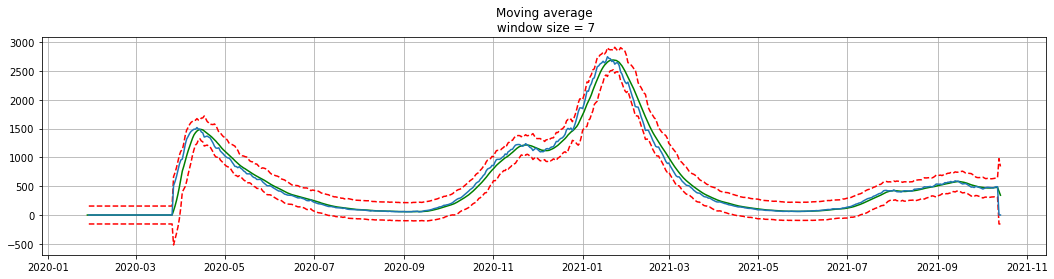

In [11]:
# Re-Plotting Channel Islands moving average hospitalisation rates
plot_moving_average(sample_ci_newformat.Hospitalised,7,plot_intervals=True)

### Question 2:

The consultant performed a calculation that looks interesting, but the team is unsure about what the intention was and how to interpret the output. Can you offer some insights into the meaning of the code and output in the cell below? Is it useful?

In [12]:
# Return the top three days with biggest difference between daily value and rolling 7-day mean
# Original code sniplet
s = sample_ci.copy()
s_rolling = s['Hospitalised'].rolling(window=7).mean()
s['error'] = mean_absolute_error(s['Hospitalised'][7:], s_rolling[7:])
s.sort_values('error', ascending=False).head(3)

,Province/State,Date,Hospitalised,error
2593,Channel Islands,2020-03-27,509.0,436.285714
2594,Channel Islands,2020-03-28,579.0,423.571429
2595,Channel Islands,2020-03-29,667.0,416.285714


In [14]:
# Return the top three days with biggest difference between daily value and rolling 7-day mean
# Tuna Tuncay version
s = sample_ci.copy()
s['rolling'] = s['Hospitalised'].rolling(window=7).mean()
s['error2'] = mean_absolute_error(s['Hospitalised'][6:], s['rolling'][6:])
s.sort_values('error2', ascending=False).head(3)

,Province/State,Date,Hospitalised,rolling,error2
2593,Channel Islands,2020-03-27,509.0,72.714286,436.285714
2594,Channel Islands,2020-03-28,579.0,155.428571,423.571429
2595,Channel Islands,2020-03-29,667.0,250.714286,416.285714


## Reflection on code

Here the previous analyst, wrote a code that calculate and returns days which has the most divergence from rolling average of last 7 days of hospitalised numbers. The code is pretty straightforward, however I believe there is a mistake on indexing. Since the model is calculating moving average of last 7 days, first data should be located in 7th row which is at index = 0 (Remember indexs start from 0).
I modified the code accordingly, the dates and results has not changed. In addition I added rolling values as a column to my df just to make sure my results.

### Question 3:

The management team had some additional questions around the project where they asked for further feedback to be included in your final presentation. Make sure to answer the questions in the Notebook in Markdown format in preparation for your presentation. The expectation is that you will provide short and direct responses to help them understand the importance and impact of the questions below.

#### Question 3.1 (double click cell to edit)
- What is the difference between qualitative and quantitative data? How can these be used in business predictions?

Qualitative data enables you to aggregate the values and derive summary conclusions. Whereas qualitative data is catagorical, cannot be aggregated. Useful to group the data.

#### Question 3.2 (double click cell to edit)
- Can you provide you observations around why continuous improvement is required, can we not just implement the project and move on to other pressing matters?

Data is flowing all the time. We need to keep updated the numbers and iterate findings contuniously. It is part of the learning.

#### Question 3.3 (double click cell to edit)
- As a government, we adhere to all data protection requirements and have good governance in place. Does that mean we can ignore data ethics? We only work with aggregated data and therefore will not expose any personal details? (Provide an example of how data ethics could apply to this case; two or three sentences max)

The data we have is inline with data ethics. There is no personal information that can lead us to people. Any further analysis requiring to drill down to certain dates and regions may lead us to personal level. If it is really neded, we should make sure we have the consent to people to analyze their personal data and still any finding are presented with masked view.